In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('StudentsPerformance.csv')
sns.set(style="whitegrid", palette="muted", color_codes=True)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
score_ranges = [(0, 19), (20, 60), (61, 100)] 
total_female = (data['gender'] == 'female').sum()
total_male = (data['gender'] == 'male').sum()

print("Total female:")
print(total_female)
print("Total male:")
print(total_male)

math_counts = { 'female': [0, 0, 0], 'male': [0, 0, 0] }
reading_counts = { 'female': [0, 0, 0], 'male': [0, 0, 0] }
writing_counts = { 'female': [0, 0, 0], 'male': [0, 0, 0] }

def calculate_counts(subject, gender, lower, upper):
    return ((data[subject] >= lower) & (data[subject] <= upper) & (data['gender'] == gender)).sum()

for gender in ['female', 'male']:
    for i, (lower, upper) in enumerate(score_ranges):
        math_counts[gender][i] = calculate_counts('math score', gender, lower, upper)
        reading_counts[gender][i] = calculate_counts('reading score', gender, lower, upper)
        writing_counts[gender][i] = calculate_counts('writing score', gender, lower, upper)

math_df = pd.DataFrame(math_counts, index=['0-19', '20-60', '61-100']).T
reading_df = pd.DataFrame(reading_counts, index=['0-19', '20-60', '61-100']).T
writing_df = pd.DataFrame(writing_counts, index=['0-19', '20-60', '61-100']).T

print("Math Scores:")
print(math_df)
print("\nReading Scores:")
print(reading_df)
print("\nWriting Scores:")
print(writing_df)

Total female:
518
Total male:
482
Math Scores:
        0-19  20-60  61-100
female     4    201     313
male       0    134     348

Reading Scores:
        0-19  20-60  61-100
female     1     97     420
male       0    177     305

Writing Scores:
        0-19  20-60  61-100
female     1     99     418
male       2    199     281


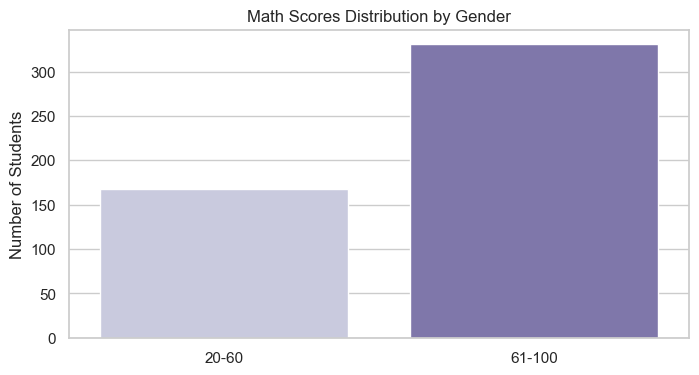

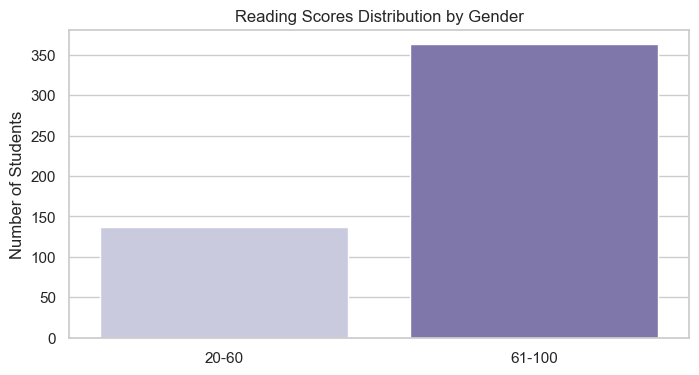

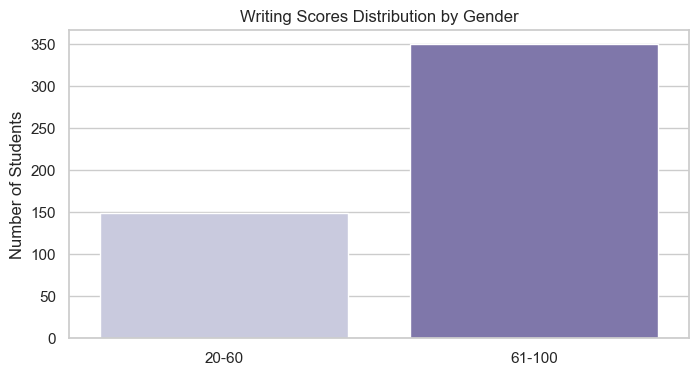

In [5]:
def create_bar_chart(dataframe, title, palette):
    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")
    sns.barplot(data=dataframe, palette=palette, errorbar=None)
    plt.title(title)
    plt.ylabel('Number of Students')
    plt.show()

create_bar_chart(math_df.drop('0-19', axis=1), 'Math Scores Distribution by Gender', 'Purples')
create_bar_chart(reading_df.drop('0-19', axis=1), 'Reading Scores Distribution by Gender', 'Purples')
create_bar_chart(writing_df.drop('0-19', axis=1), 'Writing Scores Distribution by Gender', 'Purples')

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


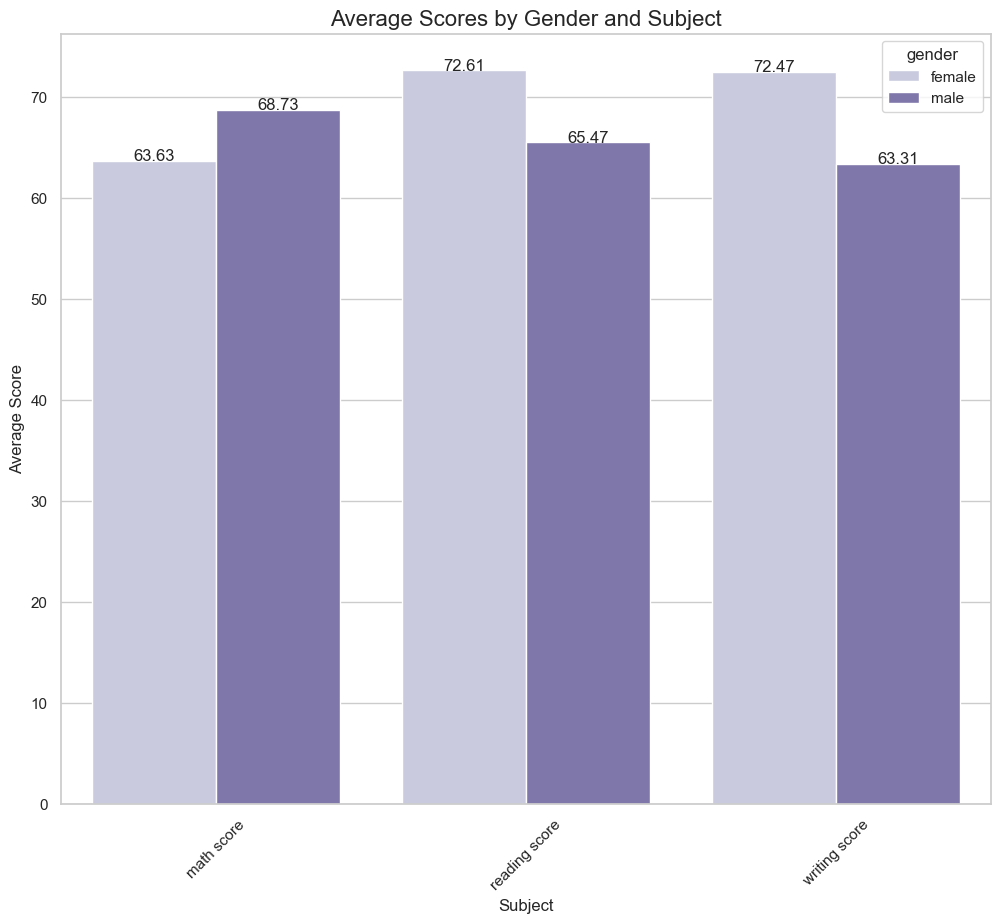

In [6]:
avg_scores_gender = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(avg_scores_gender)
melted_avg_scores_gender = avg_scores_gender.reset_index().melt(id_vars='gender', var_name='subject', value_name='average_score')

plt.figure(figsize=(12, 10))
sns.set(style="whitegrid", palette="muted")
barplot = sns.barplot(x='subject', y='average_score', hue='gender', data=melted_avg_scores_gender, palette='Purples')
plt.title('Average Scores by Gender and Subject', fontsize=16)
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45)

for p in barplot.patches:
    if p.get_height() > 0:
        barplot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'top', xytext = (0, 9), textcoords = 'offset points')

plt.savefig('first_graph.png')
plt.show()

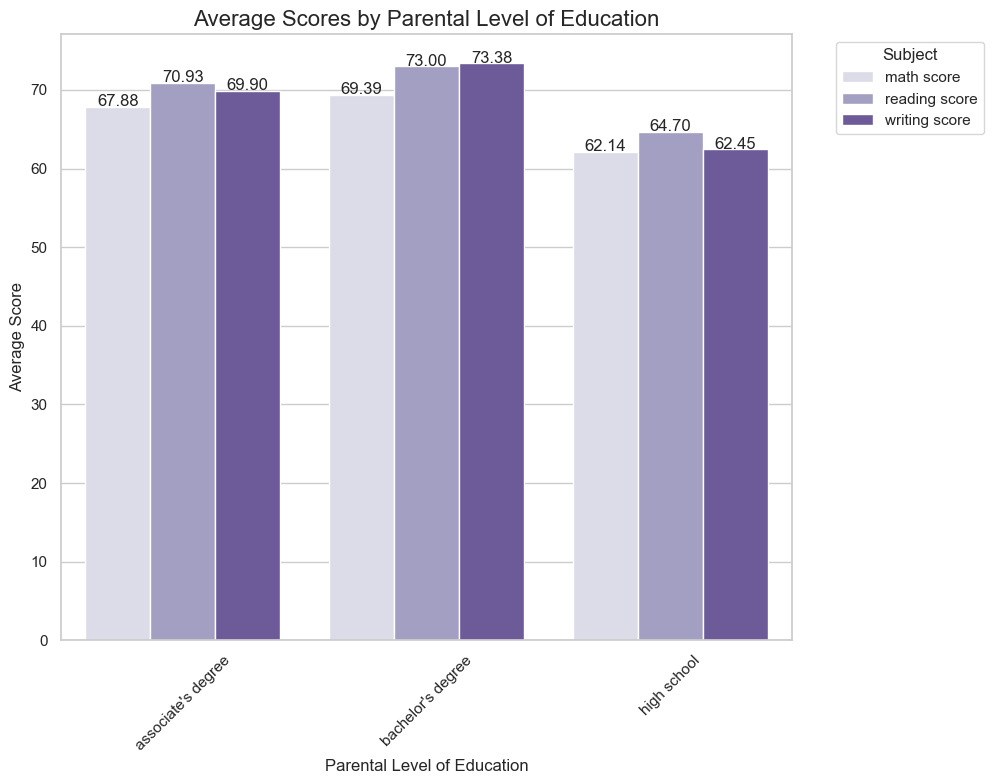

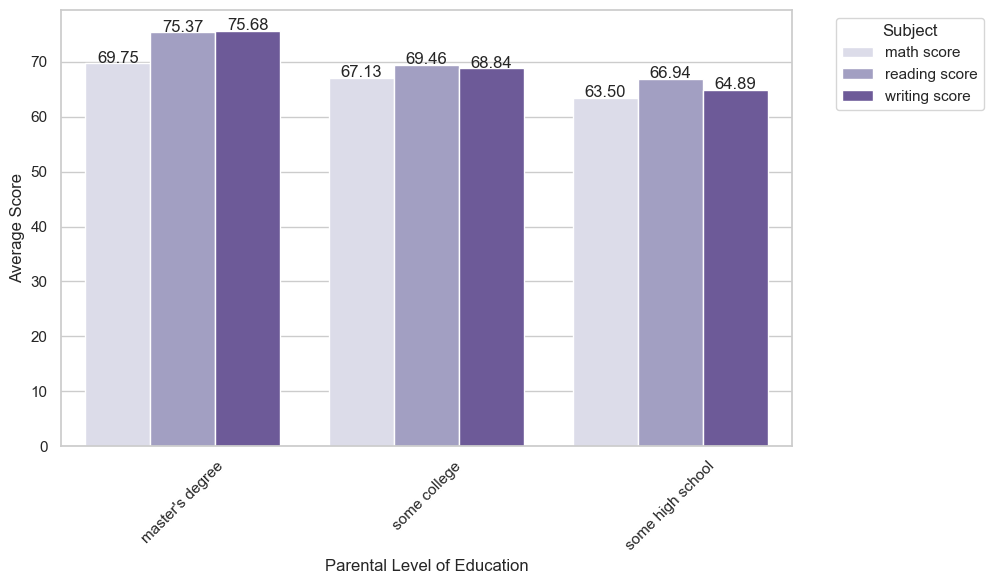

In [7]:
avg_scores_parental_education = data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

parental_education_levels = avg_scores_parental_education.index.tolist()
first_group_levels = parental_education_levels[:3]
first_group_data = avg_scores_parental_education.loc[first_group_levels]
second_group_levels = parental_education_levels[3:]
second_group_data = avg_scores_parental_education.loc[second_group_levels]

melted_first_group = first_group_data.reset_index().melt(id_vars='parental level of education', var_name='subject', value_name='average_score')
melted_second_group = second_group_data.reset_index().melt(id_vars='parental level of education', var_name='subject', value_name='average_score')

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 8))
barplot1 = sns.barplot(x='parental level of education', y='average_score', hue='subject', data=melted_first_group, palette='Purples')
plt.title('Average Scores by Parental Level of Education', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])

for p in barplot1.patches:
    if p.get_height() > 0:
        barplot1.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'top', xytext = (0, 9), textcoords = 'offset points')
    
plt.savefig('second_graph1.png')
plt.show()

plt.figure(figsize=(12, 6))
barplot2 = sns.barplot(x='parental level of education', y='average_score', hue='subject', data=melted_second_group, palette='Purples')
plt.xticks(rotation=45)
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])

for p in barplot2.patches:
    if p.get_height() > 0:
        barplot2.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'top', xytext = (0, 9), textcoords = 'offset points')
    
plt.savefig('second_graph2.png')
plt.show()

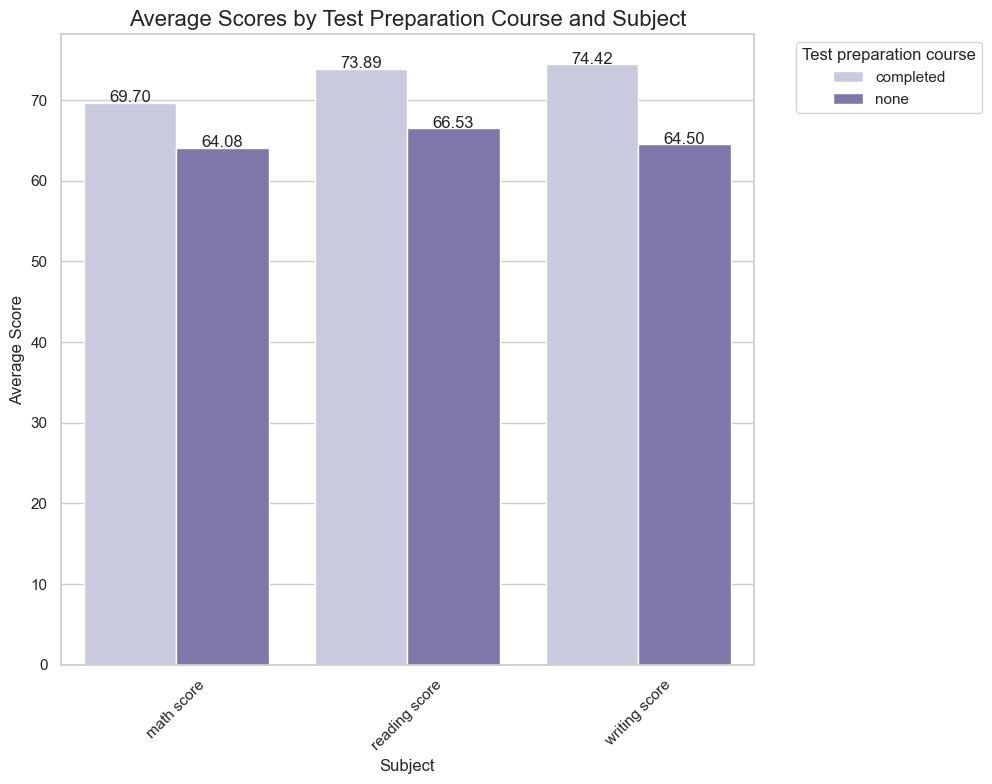

In [8]:
avg_scores_test_prep = data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
melted_avg_scores_test_prep = avg_scores_test_prep.reset_index().melt(id_vars='test preparation course', var_name='subject', value_name='average_score')

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", palette="muted")
barplot3 = sns.barplot(x='subject', y='average_score', hue='test preparation course', data=melted_avg_scores_test_prep, palette='Purples')

plt.title('Average Scores by Test Preparation Course and Subject', fontsize=16)
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Test preparation course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])

for p in barplot3.patches:
    if p.get_height() > 0:
        barplot3.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'top', xytext = (0, 9), textcoords = 'offset points')
    
plt.savefig('third_graph.png')
plt.show()

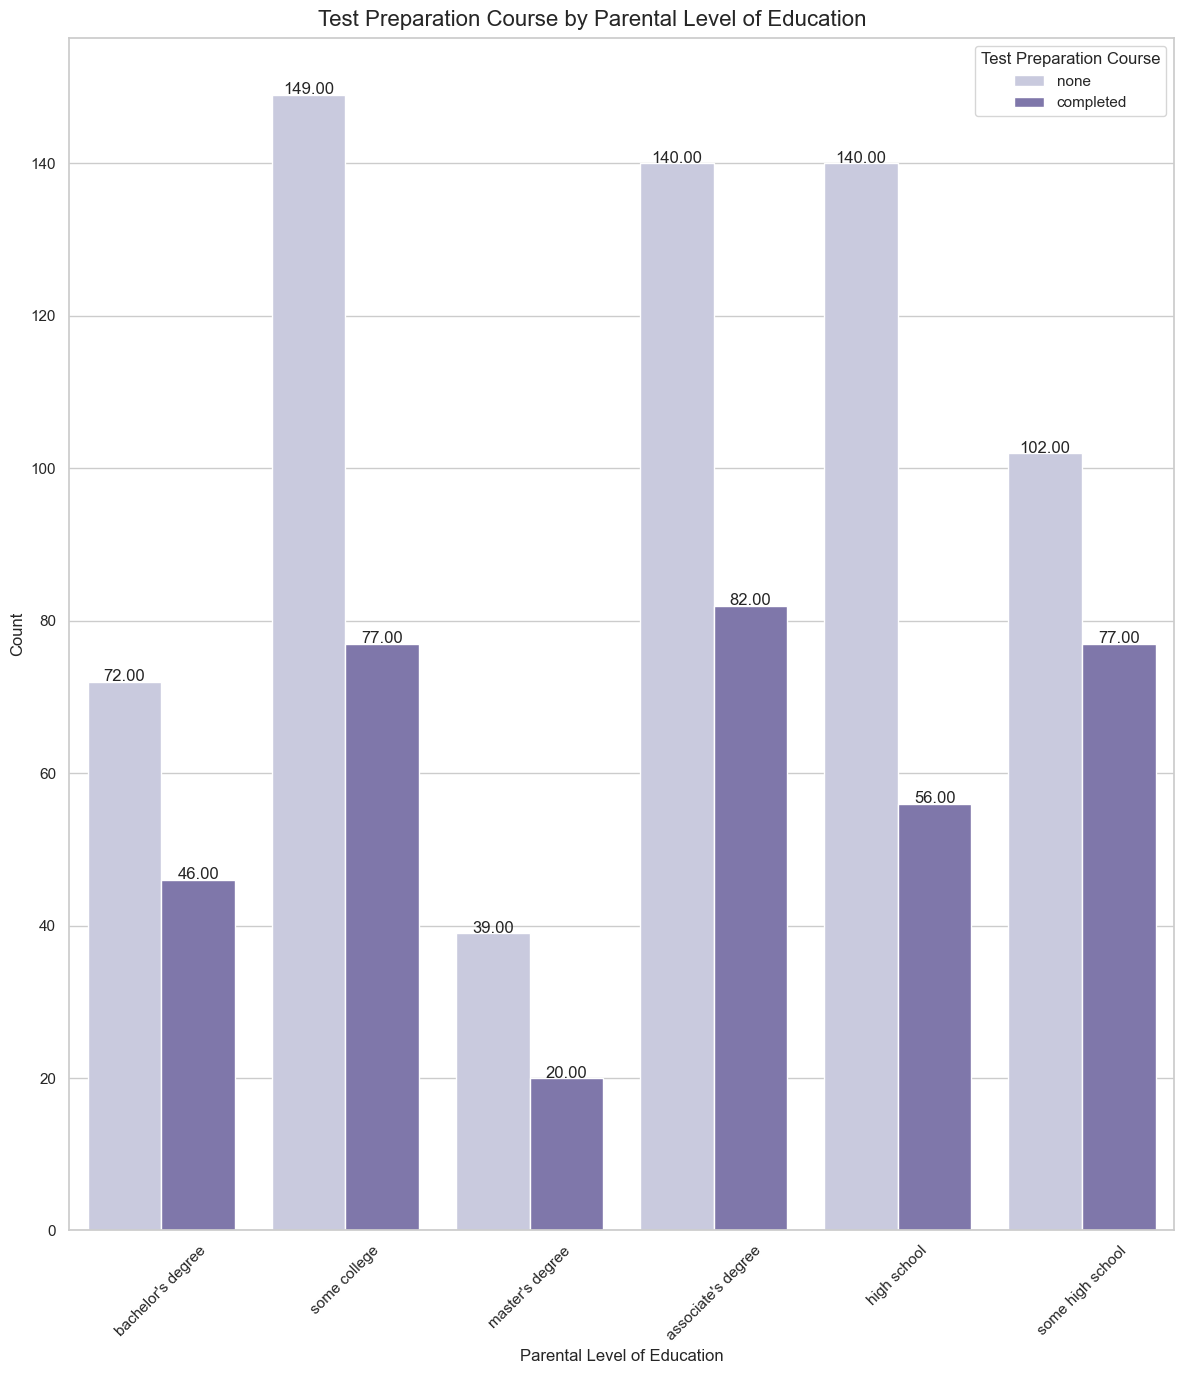

In [9]:
plt.figure(figsize=(12, 14))
plt.suptitle('Test Preparation Course by Parental Level of Education', fontsize=16)

barplot4 = sns.countplot(x='parental level of education', hue='test preparation course', data=data, palette='Purples')
plt.xticks(rotation=45)
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.legend(title='Test Preparation Course')

for p in barplot4.patches:
    if p.get_height() > 0:
        barplot4.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'top', xytext = (0, 9), textcoords = 'offset points')
    
plt.savefig('fourth_graph.png')
plt.tight_layout()